In [1]:
import os
import pandas as pd

columns = ["ID","YEAR","MONTH","DAY","ELEMENT","TEMP_C","COUNTRY_CODE"]

parts = []
for file in os.listdir(os.path.expanduser("D:\\newzealand_stations_temperature.csv\\")):
    if file == "_SUCCESS":
        continue
    try:
        data_temperature = pd.read_csv(f"D:\\newzealand_stations_temperature.csv\\{file}", header=None, names=columns)
        parts.append(data_temperature)
    except pd.io.common.EmptyDataError:
        pass

data_temperature = pd.concat(parts).sort_values(["ID"])

data_temperature.head(20)

,ID,YEAR,MONTH,DAY,ELEMENT,TEMP_C,COUNTRY_CODE
0,NZ000093012,2008,8,10,TMAX,19.0,NZ
13844,NZ000093012,1998,1,31,TMIN,16.5,NZ
13843,NZ000093012,1998,1,31,TMAX,27.3,NZ
13842,NZ000093012,1998,1,30,TMIN,16.8,NZ
13841,NZ000093012,1998,1,30,TMAX,26.3,NZ
13840,NZ000093012,1998,1,29,TMIN,19.7,NZ
13839,NZ000093012,1998,1,29,TMAX,24.7,NZ
13838,NZ000093012,1998,1,28,TMIN,19.9,NZ
13845,NZ000093012,1998,2,1,TMAX,28.6,NZ
13837,NZ000093012,1998,1,28,TMAX,26.7,NZ


In [2]:
import numpy as np
temperature_NZ = data_temperature.pivot_table(values='TEMP_C', index='YEAR', columns='ELEMENT',aggfunc=np.mean)
print(temperature_NZ)

ELEMENT       TMAX       TMIN
YEAR                         
1940     20.103010  14.803679
1941     17.051554  11.772527
1942     19.696328  10.485616
1943     15.899119  10.458767
1944     15.723814   9.830510
...            ...        ...
2018     18.205804   9.574757
2019     18.092661   8.957908
2020     17.466722   8.638333
2021     17.930301   9.336597
2022     18.087949   9.968475

[83 rows x 2 columns]


Text(0, 0.5, 'TEMPERATURE in CELCIUS')

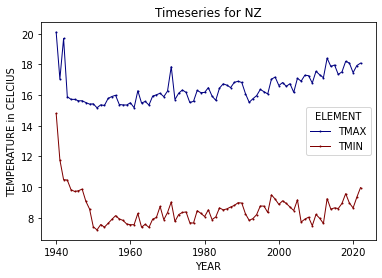

In [3]:
#temperature_NZ.plot()
ax = temperature_NZ.plot(lw=1, colormap='jet', marker='.', markersize=2, title='Timeseries for NZ')
ax.set_xlabel("YEAR")
ax.set_ylabel("TEMPERATURE in CELCIUS")

In [14]:
#Save the plot 
fig = ax.get_figure()
fig.savefig('D:\\plots\\nz_timeseries.jpg', dpi = 600)

In [ ]:
#Yearly plot of TMIN TMAX of each station of NZ
from matplotlib.ticker import MaxNLocator
stations_NZ = data_temperature['ID'].unique()
for stn in stations_NZ:
    p=stn
    stn = data_temperature[data_temperature["ID"] == stn]
    stn = stn.pivot_table(values='TEMP_C', index='YEAR', columns='ELEMENT',aggfunc=np.mean)
    ax = stn.plot(lw=1, colormap='jet', marker='.', markersize=2, title= p)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel("YEAR")
    ax.set_ylabel("TEMPERATURE in CELCIUS")
    fig = ax.get_figure()
    fig.savefig(f'D:\\plots\\stationwise_plot\\{p}.jpg', dpi = 600)

In [4]:
stations_NZ = data_temperature['ID'].unique()
stations_NZ

array(['NZ000093012', 'NZ000093292', 'NZ000093417', 'NZ000093844',
       'NZ000093994', 'NZ000933090', 'NZ000936150', 'NZ000937470',
       'NZ000939450', 'NZ000939870', 'NZM00093110', 'NZM00093439',
       'NZM00093678', 'NZM00093781', 'NZM00093929'], dtype=object)

In [ ]:
# Month wise plot of TMIN TMAX for each year for every station
years = data_temperature['YEAR'].unique()
for stn in stations_NZ:
    for year in years:
        x = (data_temperature[(data_temperature["YEAR"] == year) & (data_temperature["ID"] == stn)]) 
        x = x.pivot_table(values='TEMP_C', index=['YEAR','MONTH',"DAY"], columns='ELEMENT',aggfunc=np.mean)
        try:
            ax = x.plot(lw=1, colormap='jet', marker='.', markersize=2, title= stn + "Year"+str(year),figsize=(20, 4.8))
            ax.set_xlabel("YEAR,MONTH,DAY")
            ax.set_ylabel("TEMPERATURE in CELCIUS")
            fig = ax.get_figure()
            fig.savefig(f'D:\\plots\\stationwise_plot\\{stn}\\{year}.jpg')
        except:
            pass

In [1]:
!pip install plotly

In [130]:
import plotly.graph_objs as go

In [5]:
#Load rainfall data
import os
import pandas as pd

columns = ["COUNTRY_CODE","YEAR","COUNT","MIN_RAINFALL","MAX_RAINFALL","AVERAGE_RAINFALL","COUNTRY_NAME"]

parts = []
for file in os.listdir(os.path.expanduser("D:\\rainfall\\")):
    if file == "_SUCCESS":
        continue
    try:
        data_rainfall = pd.read_csv(f"D:\\rainfall\\{file}", header=None, names=columns)
        parts.append(data_rainfall)
    except pd.io.common.EmptyDataError:
        pass

data_rainfall = pd.concat(parts).sort_values(["COUNTRY_CODE"])

data_rainfall.head(20)


,COUNTRY_CODE,YEAR,COUNT,MIN_RAINFALL,MAX_RAINFALL,AVERAGE_RAINFALL,COUNTRY_NAME
14867,AC,1966,243,0.0,42.7,1.571605,Antigua and Barbuda
1565,AC,1962,363,0.0,103.1,3.091736,Antigua and Barbuda
13985,AC,1968,245,0.0,47.0,1.748571,Antigua and Barbuda
10234,AC,1958,334,0.0,79.8,3.564970,Antigua and Barbuda
14396,AC,1967,59,0.0,77.2,1.667797,Antigua and Barbuda
5187,AC,1970,32,0.0,15.5,0.684375,Antigua and Barbuda
12135,AC,1961,334,0.0,41.9,2.397904,Antigua and Barbuda
1646,AC,1959,365,0.0,109.0,3.056164,Antigua and Barbuda
10634,AC,1969,313,0.0,79.0,3.353355,Antigua and Barbuda
8027,AC,1957,122,0.0,56.1,5.322951,Antigua and Barbuda


In [134]:
#Filter observations for 2021
rainfall_2021 = data_rainfall[data_rainfall["YEAR"] == 2021]
rainfall_2021 = rainfall_2021[["COUNTRY_NAME","AVERAGE_RAINFALL"]]
rainfall_2021.sort_values(["AVERAGE_RAINFALL"]).head(30)

,COUNTRY_NAME,AVERAGE_RAINFALL
17071,United Arab Emirates,0.000000
17076,Wake Island [United States],0.000000
17035,Bangladesh,0.000000
17153,Venezuela,0.000000
16828,Iraq,0.143373
16366,Iran,0.487857
16218,Tunisia,0.563871
5250,Maldives,0.652226
5220,Cyprus,0.669578
4450,Falkland Islands (Islas Malvinas) [United King...,0.991341


In [136]:
#Color world map using choropleth 
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locations':rainfall_2021['COUNTRY_NAME'],
        'locationmode':'country names',
        'colorscale':'Portland',
        'z':rainfall_2021['AVERAGE_RAINFALL'],
        'colorbar':{'title':'World Rainfall in mm for 2021'},
        'marker': {
            'line': {
                'color':'rgb(255,255,255)',
                'width':2
            }
        }
    },    
    layout = {      
      'geo':{
          'scope':'world',
      }  
    })
choropleth_map